# Muhammad Muneeb Ur Rahman BSCS19057

In [59]:
# !pip install sympy

In [60]:
from sympy import *
from sympy.plotting import plot3d 

In [61]:
x=Symbol('x')
y=Symbol('y') 

# Utility Functions

In [62]:
def get_derivatives(expr):
    """this function returns the dfdx, dfdxx, dfdy, dfdyy, dfdxy tuple in the same order for the express"""
    dfdx = diff(expr, x)
    dfdxx = diff(dfdx, x)
    
    dfdy = diff(expr, y)
    dfdyy = diff(dfdy, y)
    
    dfdxy = diff(dfdx, y)
    return dfdx, dfdy, dfdxx, dfdyy, dfdxy

def get_real_xyzs(expr, roots):
    """This function takes the list of root and separate out the x, y values and calculute the value of
    function f(x, y) on these roots."""
    xs = list(x for x, y in roots if x.is_real)
    ys = list(y for x, y in roots if y.is_real)
    zs = [expr.subs(x, xs[i]).subs(y, ys[i]) for i in range(len(xs))]
    return xs, ys, zs

def plot(expr, xs, ys, zs, x_range, y_range):
    """plot the expr function graph, and critical points given in xs, ys, and zs
    x_range takes the range for x_axis
    y_range takes the range for y_axis"""
    dic = {
    'args':[xs, ys, zs,"o"]
    }
    plot3d(expr, (x, x_range[0],x_range[1]), (y,  y_range[0],y_range[1]), markers=[dic])

def get_point_status(Dis, dfdxx, xs, ys):
    """Give the Discriminent equation, dfdxx and point xs and ys the function checks
    wether it is a saddle point, local maximum, local minimum, inconsistent.
    return list([(x, y, discriminant, "point_status")])"""
    ans = []
    for i in range(len(xs)):
        d = Dis.subs(x, xs[i]).subs(y, ys[i])
        fxx = dfdxx.subs(x, xs[i]).subs(y, ys[i])
        if d<0:
            ans.append((xs[i], ys[i], d, "saddle point"))
        elif d>0:
            if fxx<0:
                ans.append((xs[i], ys[i], d, "local maximum"))
            elif fxx>0:
                ans.append((xs[i], ys[i], d, "local minimum"))
        else:
            ans.append((xs[i], ys[i], d, "inconsistent"))
    return ans

def plot_all(deri):
    """takes the list of derivative functions and plot all the graphs."""
    derivatives = ['dfdx', 'dfdy', 'dfdxx', 'dfdyy', 'dfdxy']
    for d in range(5):
        print(derivatives[d]+" = ", deri[d])
        if x in deri[d].free_symbols or y in deri[d].free_symbols:
            plot3d(deri[d], (x, -15, 15),(y, -15, 15))
#         else:
#             plot(deri[d])

## Q1 a)

In [63]:
expr=x**4+y**4+16*x*y 
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([-2, 0, 2], [2, 0, -2], [-32, 0, -32])

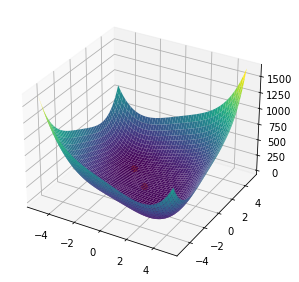

In [64]:
plot(expr, xs, ys, zs, (-5, 5), (-5, 5))

In [65]:
# plot_all(deri)

## b)

In [66]:
expr=sqrt(x**2+y**2)+1
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([], [], [])

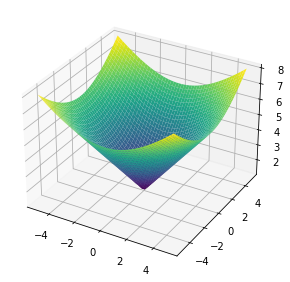

In [67]:
plot(expr, xs, ys, zs, (-5, 5), (-5, 5))

In [68]:
# plot_all(deri)

# c)

In [88]:
expr=E**-(x**2+y**2+2*x)
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([-1], [0], [E])

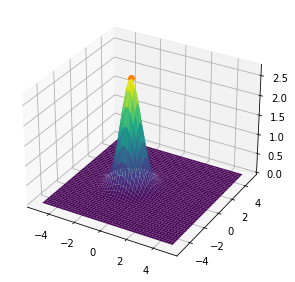

In [89]:
plot(expr, xs, ys, zs, (-5, 5), (-5, 5))

In [91]:
# plot_all(deri)

## Q2 a)

In [72]:
expr=x*E**y-E**x
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([0], [0], [-1])

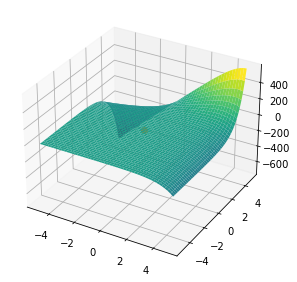

In [73]:
plot(expr, xs, ys, zs, (-5, 5), (-5, 5))

In [74]:
# plot_all(deri)

In [75]:
Dis = deri[2]*deri[3]-deri[4]**2

In [76]:
get_point_status(Dis, deri[2], xs, ys)

[(0, 0, -1, 'saddle point')]

#### As D<0, so it is a saddle point

# b)

In [77]:
expr=x*sin(y)
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([0, 0], [0, pi], [0, 0])

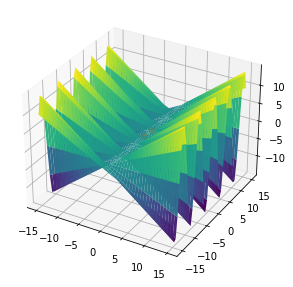

In [78]:
plot(expr, xs, ys, zs, (-15, 15), (-15, 15))

In [79]:
# plot_all(deri)

In [80]:
Dis = deri[2]*deri[3]-deri[4]**2

In [81]:
get_point_status(Dis, deri[2], xs, ys)

[(0, 0, -1, 'saddle point'), (0, pi, -1, 'saddle point')]

### As the discriminant is lesser than 0, so both points are saddle

# c)

In [82]:
expr=4*x*y-x**4-y**4
deri = get_derivatives(expr)
droot = solve([deri[0], deri[1]], [x, y])
xs, ys, zs = get_real_xyzs(expr, droot)
xs, ys, zs

([-1, 0, 1], [-1, 0, 1], [2, 0, 2])

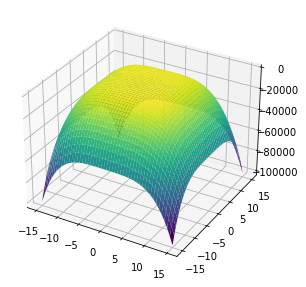

In [83]:
plot(expr, xs, ys, zs, (-15, 15), (-15, 15))

In [84]:
# plot_all(deri)

In [85]:
Dis = deri[2]*deri[3]-deri[4]**2

In [86]:
get_point_status(Dis, deri[2], xs, ys)

[(-1, -1, 128, 'local maximum'),
 (0, 0, -16, 'saddle point'),
 (1, 1, 128, 'local maximum')]

#### for point(0, 0), D<0 so, it is a saddle point.
#### for point(-1, -1), D>0 and fxx<0 so, it is a local maximum.
#### for point(-1, -1), D>0 and fxx<0 so, it is also a local maximum.